In [1]:
import tensorflow as tf
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
insurance = pd.read_csv("https://raw.githubusercontent.com/stedy/Machine-Learning-with-R-datasets/master/insurance.csv")
insurance

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520
...,...,...,...,...,...,...,...
1333,50,male,30.970,3,no,northwest,10600.54830
1334,18,female,31.920,0,no,northeast,2205.98080
1335,18,female,36.850,0,no,southeast,1629.83350
1336,21,female,25.800,0,no,southwest,2007.94500


In [3]:
insurance.columns

Index(['age', 'sex', 'bmi', 'children', 'smoker', 'region', 'charges'], dtype='object')

In [4]:
insurance["sex"]

0       female
1         male
2         male
3         male
4         male
         ...  
1333      male
1334    female
1335    female
1336    female
1337    female
Name: sex, Length: 1338, dtype: object

In [5]:
  pd.get_dummies(insurance)

,age,bmi,children,charges,sex_female,sex_male,smoker_no,smoker_yes,region_northeast,region_northwest,region_southeast,region_southwest
0,19,27.900,0,16884.92400,1,0,0,1,0,0,0,1
1,18,33.770,1,1725.55230,0,1,1,0,0,0,1,0
2,28,33.000,3,4449.46200,0,1,1,0,0,0,1,0
3,33,22.705,0,21984.47061,0,1,1,0,0,1,0,0
4,32,28.880,0,3866.85520,0,1,1,0,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...
1333,50,30.970,3,10600.54830,0,1,1,0,0,1,0,0
1334,18,31.920,0,2205.98080,1,0,1,0,1,0,0,0
1335,18,36.850,0,1629.83350,1,0,1,0,0,0,1,0
1336,21,25.800,0,2007.94500,1,0,1,0,0,0,0,1


In [6]:
insurance_one_hot_encoded = pd.get_dummies(insurance)
insurance_one_hot_encoded.head()

,age,bmi,children,charges,sex_female,sex_male,smoker_no,smoker_yes,region_northeast,region_northwest,region_southeast,region_southwest
0,19,27.900,0,16884.92400,1,0,0,1,0,0,0,1
1,18,33.770,1,1725.55230,0,1,1,0,0,0,1,0
2,28,33.000,3,4449.46200,0,1,1,0,0,0,1,0
3,33,22.705,0,21984.47061,0,1,1,0,0,1,0,0
4,32,28.880,0,3866.85520,0,1,1,0,0,1,0,0


In [7]:
X = insurance_one_hot_encoded.drop("charges", axis = 1)
y= insurance_one_hot_encoded['charges']

In [8]:
X

,age,bmi,children,sex_female,sex_male,smoker_no,smoker_yes,region_northeast,region_northwest,region_southeast,region_southwest
0,19,27.900,0,1,0,0,1,0,0,0,1
1,18,33.770,1,0,1,1,0,0,0,1,0
2,28,33.000,3,0,1,1,0,0,0,1,0
3,33,22.705,0,0,1,1,0,0,1,0,0
4,32,28.880,0,0,1,1,0,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...
1333,50,30.970,3,0,1,1,0,0,1,0,0
1334,18,31.920,0,1,0,1,0,1,0,0,0
1335,18,36.850,0,1,0,1,0,0,0,1,0
1336,21,25.800,0,1,0,1,0,0,0,0,1


In [9]:
y

0       16884.92400
1        1725.55230
2        4449.46200
3       21984.47061
4        3866.85520
           ...     
1333    10600.54830
1334     2205.98080
1335     1629.83350
1336     2007.94500
1337    29141.36030
Name: charges, Length: 1338, dtype: float64

In [10]:
#Splitting for Training
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 42)

len(X), len(X_train), len(X_test)

(1338, 1070, 268)

In [13]:
# Building ML Model
tf.random.set_seed(42)

insurance_model = tf.keras.Sequential([
    tf.keras.layers.Dense(10),
    tf.keras.layers.Dense(1)

])


insurance_model.compile(loss=tf.keras.losses.mae,
                        optimizer=tf.keras.optimizers.SGD(),
                        metrics=["mae"])

insurance_model.fit(X_train, y_train, epochs = 100)

Epoch 1/100
34/34 [==============================] - 1s 2ms/step - loss: 8552.3398 - mae: 8552.3398
Epoch 2/100
34/34 [==============================] - 0s 2ms/step - loss: 7884.6226 - mae: 7884.6226
Epoch 3/100
34/34 [==============================] - 0s 2ms/step - loss: 7599.9419 - mae: 7599.9419
Epoch 4/100
34/34 [==============================] - 0s 1ms/step - loss: 7664.9277 - mae: 7664.9277
Epoch 5/100
34/34 [==============================] - 0s 1ms/step - loss: 7731.1577 - mae: 7731.1577
Epoch 6/100
34/34 [==============================] - 0s 2ms/step - loss: 7623.7734 - mae: 7623.7734
Epoch 7/100
34/34 [==============================] - 0s 2ms/step - loss: 7587.7344 - mae: 7587.7344
Epoch 8/100
34/34 [==============================] - 0s 2ms/step - loss: 7737.9224 - mae: 7737.9224
Epoch 9/100
34/34 [==============================] - 0s 1ms/step - loss: 7589.3149 - mae: 7589.3149
Epoch 10/100
34/34 [==============================] - 0s 1ms/step - loss: 7662.1611 - mae: 7662.1611

In [15]:
# Building ML Model
tf.random.set_seed(42)

insurance_model = tf.keras.Sequential([
    tf.keras.layers.Dense(100),
    tf.keras.layers.Dense(10),
    tf.keras.layers.Dense(1)

])


insurance_model.compile(loss=tf.keras.losses.mae,
                        optimizer=tf.keras.optimizers.Adam(),
                        metrics=["mae"])

insurance_model.fit(X_train, y_train, epochs = 100, verbose =0)

In [16]:
insurance_model.evaluate(X_test, y_test)

9/9 [==============================] - 0s 3ms/step - loss: 4895.0186 - mae: 4895.0186


[4895.0185546875, 4895.0185546875]

In [23]:
# Building ML Model
tf.random.set_seed(42)

insurance_model = tf.keras.Sequential([
    tf.keras.layers.Dense(100),
    tf.keras.layers.Dense(10),
    tf.keras.layers.Dense(1)

])


insurance_model.compile(loss=tf.keras.losses.mae,
                        optimizer=tf.keras.optimizers.Adam(),
                        metrics=["mae"])

history = insurance_model.fit(X_train, y_train, epochs = 200, verbose =1)

Epoch 1/200
34/34 [==============================] - 1s 1ms/step - loss: 13298.7148 - mae: 13298.7148
Epoch 2/200
34/34 [==============================] - 0s 1ms/step - loss: 13151.1885 - mae: 13151.1885
Epoch 3/200
34/34 [==============================] - 0s 1ms/step - loss: 12842.1953 - mae: 12842.1953
Epoch 4/200
34/34 [==============================] - 0s 1ms/step - loss: 12220.9805 - mae: 12220.9805
Epoch 5/200
34/34 [==============================] - 0s 1ms/step - loss: 11144.6689 - mae: 11144.6689
Epoch 6/200
34/34 [==============================] - 0s 2ms/step - loss: 9697.5439 - mae: 9697.5439
Epoch 7/200
34/34 [==============================] - 0s 1ms/step - loss: 8299.6328 - mae: 8299.6328
Epoch 8/200
34/34 [==============================] - 0s 1ms/step - loss: 7564.4526 - mae: 7564.4526
Epoch 9/200
34/34 [==============================] - 0s 1ms/step - loss: 7429.1055 - mae: 7429.1055
Epoch 10/200
34/34 [==============================] - 0s 2ms/step - loss: 7407.9312 - mae:

In [24]:
insurance_model.evaluate(X_test, y_test)

9/9 [==============================] - 0s 1ms/step - loss: 3495.2708 - mae: 3495.2708


[3495.270751953125, 3495.270751953125]

Text(0.5, 0, 'epochs')

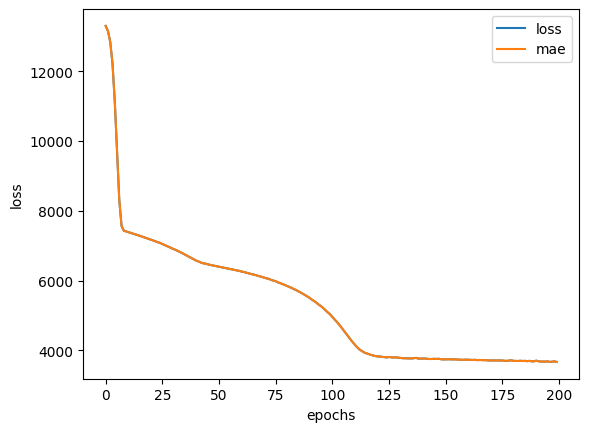

In [25]:
pd.DataFrame(history.history).plot()
plt.ylabel("loss")
plt.xlabel("epochs")

In [26]:
# feature scalling

from sklearn.compose import make_column_transformer
from sklearn.preprocessing import MinMaxScaler, OneHotEncoder
from sklearn.model_selection import train_test_split

In [28]:
ct = make_column_transformer(
    (MinMaxScaler(), ["age", "bmi", "children"]),
    (OneHotEncoder(handle_unknown="ignore"), ["sex", "smoker", "region"])
)


X = insurance.drop("charges", axis =1)
y = insurance["charges"]


X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state=42)

ct.fit(X_train)

X_train_normal = ct.transform(X_train)
X_test_normal = ct.transform(X_test)

In [29]:
X_train.loc[0]

age                19
sex            female
bmi              27.9
children            0
smoker            yes
region      southwest
Name: 0, dtype: object

In [31]:
X_train_normal[0]

array([0.60869565, 0.10734463, 0.4       , 1.        , 0.        ,
       1.        , 0.        , 0.        , 1.        , 0.        ,
       0.        ])

In [32]:
X_train

,age,sex,bmi,children,smoker,region
560,46,female,19.950,2,no,northwest
1285,47,female,24.320,0,no,northeast
1142,52,female,24.860,0,no,southeast
969,39,female,34.320,5,no,southeast
486,54,female,21.470,3,no,northwest
...,...,...,...,...,...,...
1095,18,female,31.350,4,no,northeast
1130,39,female,23.870,5,no,southeast
1294,58,male,25.175,0,no,northeast
860,37,female,47.600,2,yes,southwest


In [33]:
X_train_normal

array([[0.60869565, 0.10734463, 0.4       , ..., 1.        , 0.        ,
        0.        ],
       [0.63043478, 0.22491256, 0.        , ..., 0.        , 0.        ,
        0.        ],
       [0.73913043, 0.23944041, 0.        , ..., 0.        , 1.        ,
        0.        ],
       ...,
       [0.86956522, 0.24791499, 0.        , ..., 0.        , 0.        ,
        0.        ],
       [0.41304348, 0.85122411, 0.4       , ..., 0.        , 0.        ,
        1.        ],
       [0.80434783, 0.37503363, 0.        , ..., 0.        , 0.        ,
        1.        ]])

In [34]:
X_train.shape

(1070, 6)

In [35]:
X_train_normal.shape

(1070, 11)

In [36]:
# Building ML Model
tf.random.set_seed(42)

insurance_model_normal = tf.keras.Sequential([
    tf.keras.layers.Dense(100),
    tf.keras.layers.Dense(10),
    tf.keras.layers.Dense(1)

])


insurance_model_normal.compile(loss=tf.keras.losses.mae,
                        optimizer=tf.keras.optimizers.Adam(),
                        metrics=["mae"])

history = insurance_model_normal.fit(X_train_normal, y_train, epochs = 200, verbose =1)

Epoch 1/200
34/34 [==============================] - 1s 3ms/step - loss: 13343.9932 - mae: 13343.9932
Epoch 2/200
34/34 [==============================] - 0s 2ms/step - loss: 13336.5713 - mae: 13336.5713
Epoch 3/200
34/34 [==============================] - 0s 3ms/step - loss: 13317.8516 - mae: 13317.8516
Epoch 4/200
34/34 [==============================] - 0s 3ms/step - loss: 13278.1885 - mae: 13278.1885
Epoch 5/200
34/34 [==============================] - 0s 4ms/step - loss: 13206.9648 - mae: 13206.9648
Epoch 6/200
34/34 [==============================] - 0s 3ms/step - loss: 13093.2646 - mae: 13093.2646
Epoch 7/200
34/34 [==============================] - 0s 2ms/step - loss: 12926.6133 - mae: 12926.6133
Epoch 8/200
34/34 [==============================] - 0s 3ms/step - loss: 12696.6328 - mae: 12696.6328
Epoch 9/200
34/34 [==============================] - 0s 3ms/step - loss: 12392.8867 - mae: 12392.8867
Epoch 10/200
34/34 [==============================] - 0s 2ms/step - loss: 12008.76

In [37]:
insurance_model_normal.evaluate(X_test_normal, y_test)

9/9 [==============================] - 0s 8ms/step - loss: 3176.6953 - mae: 3176.6953


[3176.6953125, 3176.6953125]